In [1]:
# import tensorflow.keras.layers as Layers
# import tensorflow.keras.activations as Actications
# import tensorflow.keras.models as Models
# import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
import tensorflow.keras.callbacks as Callbacks
# from tensorflow.python.keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [3]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

In [12]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 3
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 1
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)

    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [6]:
test_images, test_labels = get_images('../archive/seg_test/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)

pred_images,no_labels = get_images('../archive/seg_pred/')
pred_images = np.array(pred_images)

In [6]:
print(test_images.shape)
print(pred_images.shape)

(3000, 150, 150, 3)
(7301, 150, 150, 3)


In [11]:
def predict_class(model, label):

    fig = plt.figure(figsize=(30, 30))
    outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

    
    counter = 0

    while counter < 5:
        rnd_number = randint(0,len(pred_images))
        pred_image = np.array([pred_images[rnd_number]])
        pred_class = get_classlabel(model.predict_classes(pred_image)[0])
        inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[counter], wspace=0.1, hspace=0.1)
        
        if pred_class == label:
            counter += 1
            pred_prob = model.predict(pred_image).reshape(6)
            for j in range(2):
                if (j%2) == 0:
                    ax = plt.Subplot(fig, inner[j])
                    ax.imshow(pred_image[0])
                    ax.set_title(pred_class)
                    ax.set_xticks([])
                    ax.set_yticks([])
                    fig.add_subplot(ax)
                else:
                    ax = plt.Subplot(fig, inner[j])
                    ax.bar([0,1,2,3,4,5],pred_prob)
                    fig.add_subplot(ax)
        print(counter)

In [8]:
model = Models.load_model('saved_model\\4Mil_Relu')

1
1
2
3
4
5


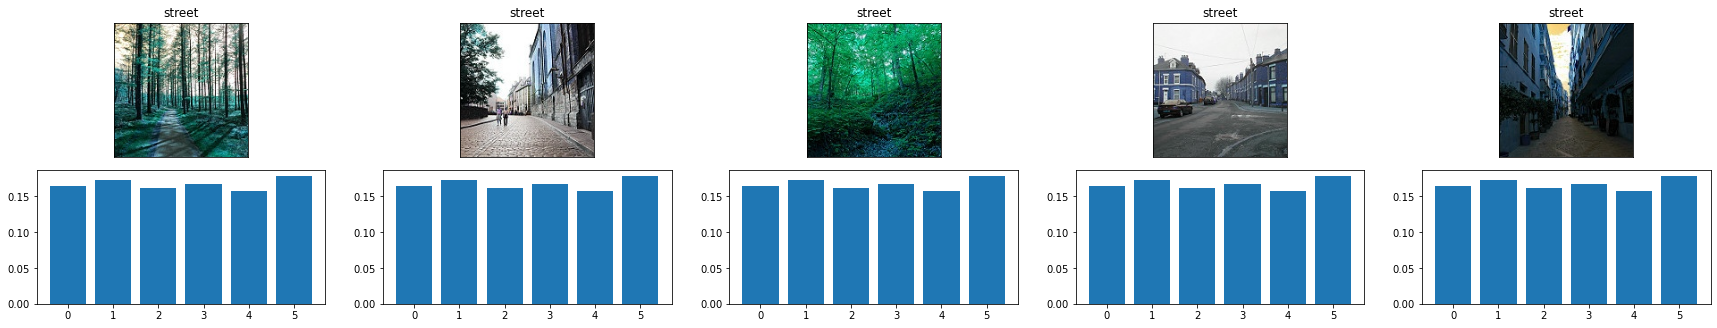

In [12]:
predict_class(model, 'street')

In [14]:

test_preds = np.argmax(test_preds, axis=0)
test_trues = np.argmax(test_labels, axis=0)
cm = confusion_matrix(test_preds, test_trues)

fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'shrink': .3}, linewidths=.1, ax=ax)

ax.set(
    xticklabels=list(label_to_class.keys()),
    yticklabels=list(label_to_class.keys()),
    title='confusion matrix',
    ylabel='True label',
    xlabel='Predicted label'
)
params = dict(rotation=45, ha='center', rotation_mode='anchor')
plt.setp(ax.get_yticklabels(), **params)
plt.setp(ax.get_xticklabels(), **params)
plt.show()


TypeError: Singleton array 2 cannot be considered a valid collection.

In [11]:
test_preds = model.predict(test_images)

In [10]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)

In [20]:
inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)

In [21]:
inner

GridSpecFromSubplotSpec(2, 1)

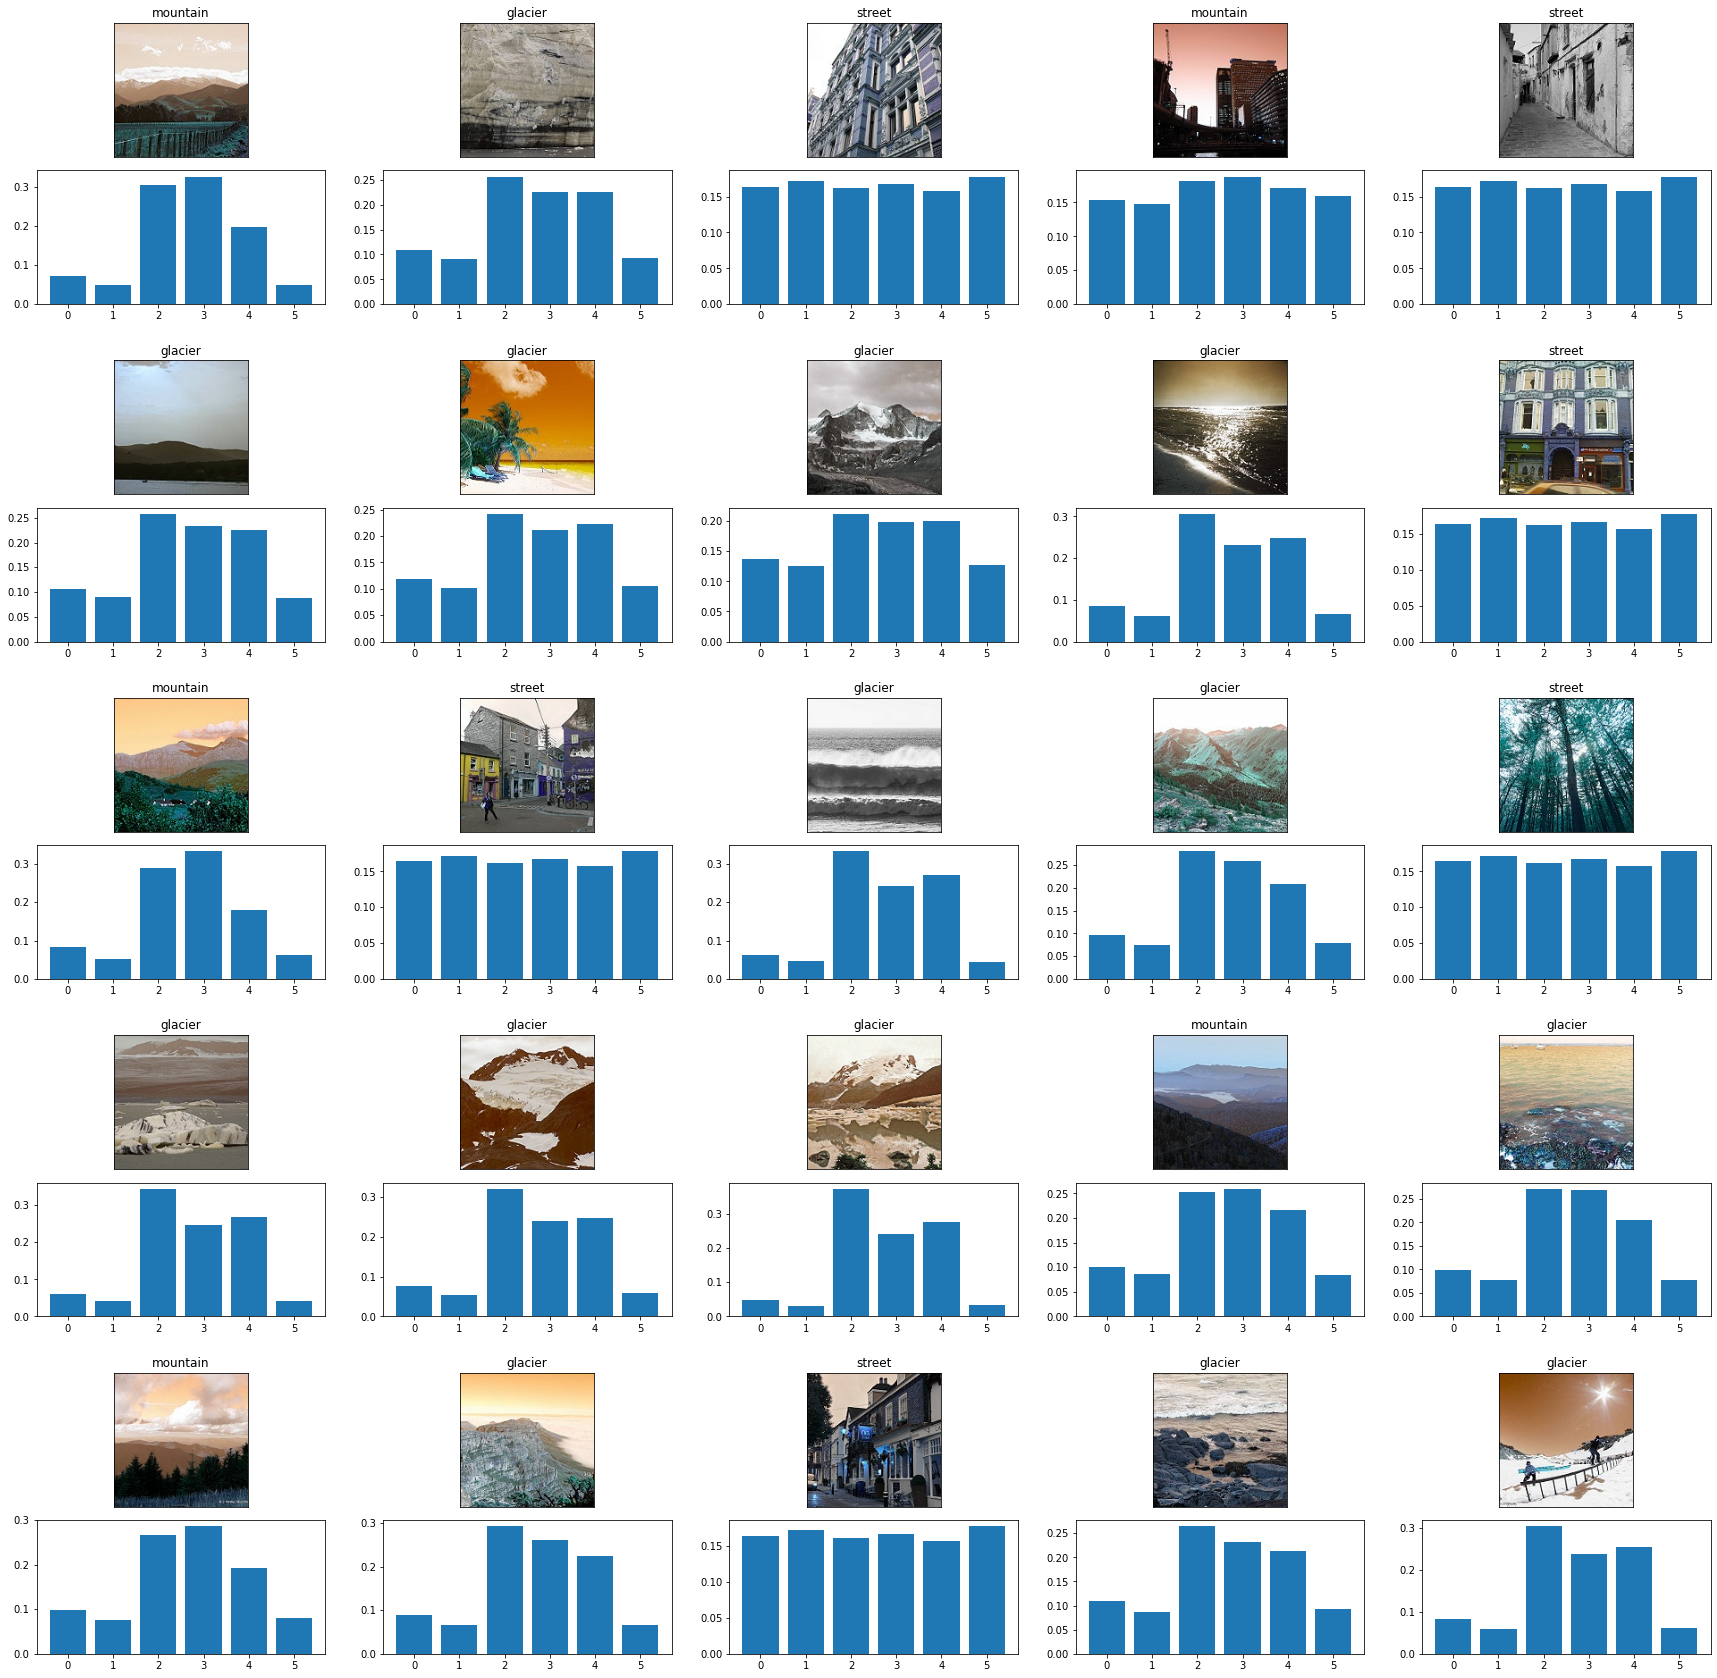

In [10]:
fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plt.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)

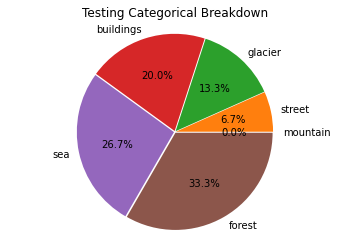

In [13]:
plt.pie(test_counts,
        explode=(0.01, 0.01, 0.01, 0.01, 0.01, 0.01) , 
        labels=class_names,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Testing Categorical Breakdown')
plt.show()

In [12]:
test_counts = np.unique(test_labels)


In [13]:
Images, Labels = get_images('../archive/seg_train/seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [6]:
image_counts = np.unique(train_labels)

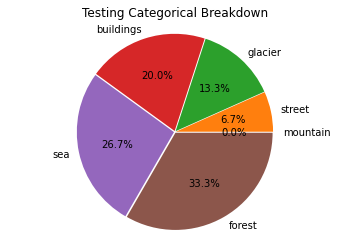

In [7]:
image_counts = np.unique(train_labels)
plt.pie(image_counts,
        explode=(0.01, 0.01, 0.01, 0.01, 0.01, 0.01) , 
        labels=class_names,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Testing Categorical Breakdown')
plt.show()

In [8]:
image_counts.shape

(6,)

In [9]:
 for folder in os.listdir('../archive/seg_train/seg_train'):
     print(folder)

buildings
forest
glacier
mountain
sea
street


In [2]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['../archive/seg_train/seg_train', '../archive/seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in os.listdir(os.path.join(dataset, folder)):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading ../archive/seg_train/seg_train
Loading ../archive/seg_test/seg_test


In [4]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [11]:
train
_images.shape

(14034, 150, 150, 3)

In [2]:
train_DIR = "../archive/seg_train/seg_train/"

train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          vertical_flip=True,
                                          fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(train_DIR,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

test_DIR = "../archive/seg_test/seg_test/"
validation_datagen = ImageDataGenerator(rescale = 1.0/255)


validation_generator = validation_datagen.flow_from_directory(test_DIR,
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [4]:
dir(train_generator)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'labels',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'samples',
 'save_format',
 'save_prefix',
 'save_to_dir',
 'see

In [7]:
train_generator.labels

array([0, 0, 0, ..., 5, 5, 5])